# Online Field Experiment

This Jupyter Notebook presents essential data exploration and evaluation. The corresponding experiment studies the effect of _salience_ informational nudges on the user experience, as well as the chosen tariff option for an online insurance product. In comparison to the pretest, **additional user data** was captured, namely: gender, family status, and housing situation. The **feedback scale** was adapted with values ranging from 1 to 7. The value 0 indicates the closing of the feedback survey without providing value.

The online field experiment was executed between 21.12.2019 and 31.12.2019. Traffic was generated via Facebook Advertisement.

In total, 11.656 users received the advertisement in _facebook_ applications during that period of time. This includes _Instagram_, _Facebook_ (mobile and desktop version), as well as the _Facebook Messenger_. The complete dataset includes customer behavior data from 328 users that visited the site. Those 328 users have made at least one interaction with the site.

Out of those 328 activities, 221 users provided feedback. Additionally, 221 users have chosen an option.

114 activities resulted in a conversion, which results in a conversion rate of 34,75%. In this case, conversion means that the user would be interested in further updates of the service and products. The conversion was the last click that was tracked on the site.

## Setup

In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [5]:
# import the data
firestore_data = pd.read_json("./firestore.json")
df = firestore_data

# import prepared data with only numeric values. Needed for calculations
df_numeric = pd.read_json("./firestore_numbers.json")

# split datasets into nudge and no nudge for better descriptions
df_nudge = df[df.nudge == 1]
df_neutral = df[df.nudge == 0]

# sort dataframe by date
df = df.sort_values(by=['created'])

# print first five rows
df.head(5)

# export json data as csv for better overview
df.to_csv('./data.csv', encoding='utf-8')

# Demographics
In comparison to the pre-study, the final experiment includes no post-survey data. Instead, additional data was captured during the customer journey. This data includes information on gender, housing situation, and family status.

Since 70 users left the site without providing all necessary data, only 258 activities in the dataset include the complete demographic information. 

It is important to note that the capturing of data has happened directly after the interaction. That means a user who clicked on a particular gender value and left the page is represented with a value for gender, but no values for family and housing situation.

In [13]:
# Users that left before providing data
df_users_no_data = df[(df.gender.isnull()) & (df.family.isnull()) & (df.housing.isnull())]

len(df_users_no_data)

70

## Gender

In [35]:
df.gender.value_counts()

male       128
female     121
diverse      9
Name: gender, dtype: int64

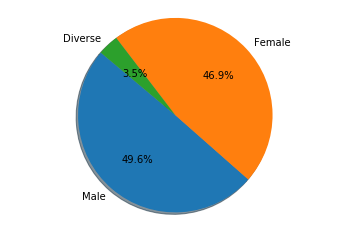

In [5]:
# Data to plot
labels = 'Male', 'Female', 'Diverse'
sizes = [128, 121, 9]

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Family Status

In [12]:
df.family.value_counts()

single    148
family    110
Name: family, dtype: int64

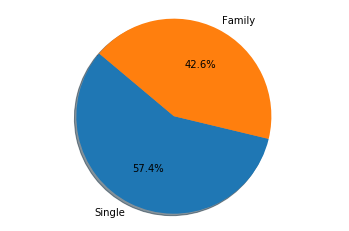

In [13]:
# Data to plot
labels = 'Single', 'Family'
sizes = [148, 110]

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Housing Situation

In [14]:
df.housing.value_counts()

rent        163
property     95
Name: housing, dtype: int64

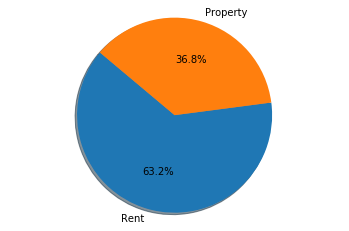

In [15]:
# Data to plot
labels = 'Rent', 'Property'
sizes = [163, 95]

# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# General Data Description

### Dataset Description
The dataset includes 328 entries of users during the timespan of the field experiment. All those users have made at least on interaction with the site. Since the customer journey includes several distinct steps, data was captured on each site. This shows how many users completed the process or canceled before a conversion.

In [38]:
len(df)

328

#### User Bevior

74 users left the site before providing data. Out of those 74 users, 4 users provided some data and left the side. 70 users provided no data at all and left the site. Those 74 users did not see the tariff options and therefore made no choice. 

In [14]:
# Users that left before providing data
df_users_no_data = df[df.inputToChoice == False]

len(df_users_no_data)

74

37 users left the site after the data input. Those users did not make a choice. This includes 20 users with no nudge, that left during the choice and 17 users that left the page while seeing the designed nudge.

In [15]:
# Users that left during choice, and provided no data
df_users_left_choice_total = df[(df.choiceToSubmit == False)]

# Users that left during choice, but provided data
df_users_left_choice = df[(df.inputToChoice == True) &(df.choiceToSubmit == False)]
print("Users that left during the choice process: ", len(df_users_left_choice))
print(" ")
print("Nudge split on users that left during the choice process:")
df_users_left_choice.nudge.value_counts()


Users that left during the choice process:  37
 
Nudge split on users that left during the choice process:


0    20
1    17
Name: nudge, dtype: int64

In [16]:
# Users with choice
df_users_with_choice = df[df.option.notnull()]

print(len(df_users_with_choice)," users made a choice.")

221  users made a choice.


Since the feedback survey has happened directly after the choice and was a low effort choice that has asked for the current emotional state, no user canceled the question and left the site with a choice, but no feedback.

Overall, 221 users provided feedback.

In [17]:
# Users that provided no feedback
df_users_no_feedback = df[(df.option.notnull()) & (df.feedback.isnull())]

# Users that provided feedback
df_users_with_feedback = df[df.feedback.notnull()]

print(len(df_users_no_feedback))
print(len(df_users_with_feedback))


0
221


114 activities resulted in a conversion, which results in a conversion rate of 34,75%. In this case, conversion means that the user would be interested in further updates of the service and products. The conversion was the last click that was tracked on the site.

In [18]:
# Users with conversion
df_users_with_conversion = df[df.conversion == True]

print(len(df_users_with_conversion))

114


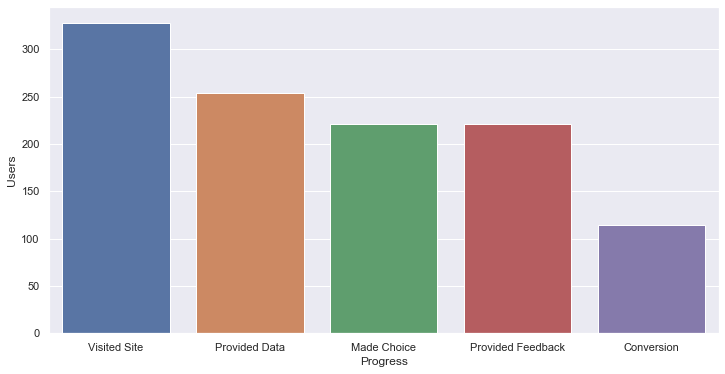

In [37]:
# Barchart with progress numbers
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,6)})

d1 =['Progress','Users']  #have taken count as users
data= [
        ['Visited Site',len(df)],
        ['Provided Data',len(df)-len(df_users_no_data)],
        ['Made Choice',len(df_users_with_choice)],
        ['Provided Feedback',len(df_users_with_feedback)],
        ['Conversion',len(df_users_with_conversion)]
       ]
df_progress =pd.DataFrame(data,columns=d1)

sns.barplot(x="Progress",y="Users", data=df_progress)

plt.show()

### Treatment Split and Terminations
The experiment aims for a 50/50 split of the treatment effect (nudge display). However, since 107 of the users left the website before the capturing of the feedback, the balance between treatment and no treatment is not truly 50/50 in the dataset.

The dataset includes the feedback of 111 users that visited the page with the nudge and 110 users who visited the website without a nudge.

In [45]:
# Check the nudge split of the users who provided feedback
with_feedback = df[df.feedback.notnull()]
with_feedback.nudge.value_counts()

0    111
1    110
Name: nudge, dtype: int64

### Chosen Tariff Option
In terms of the chosen tariff option, the _comfort_ option is the most popular. 58 of the users favored the minimal amount of security. Interestingly, the second most popular option is the _top_ option. This option is the most expensive one and covers almost every situation.

Furthermore, users that received the nudge tend to choose one of the higher coverage options.

In [3]:
df.option.value_counts()

comfort    86
top        77
basic      58
Name: option, dtype: int64

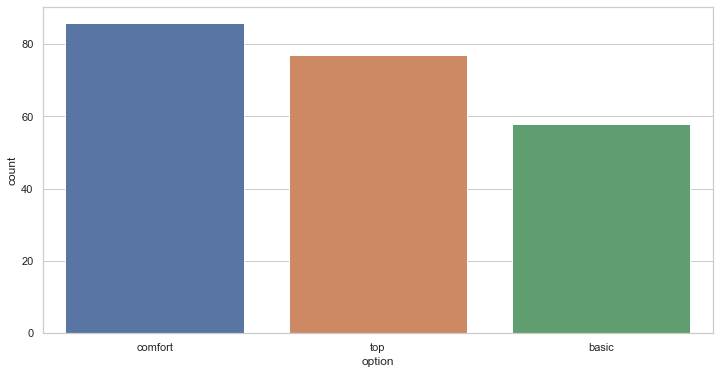

In [38]:
# Add barchart with chosen tariff options
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="option",data=df, order = df['option'].value_counts().index)


### User Experience and Feedback
Overall, most of the users have a neutral emotion towards the website. The provided feedback is nearly distributed normally. Besides the effect of the nudge, one primary reason could be the visual appealing of the site. In comparison to other insurance company, the information and focus was very clear and straightforward, which could lead to an overall, more satisfying user experience. 

_Feedback scale:_  
**sad**: 1-3  
**neutral**: 4  
**happy**: 5-7

In [72]:
df.feedback.describe()

count    221.000000
mean       4.217195
std        1.397359
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: feedback, dtype: float64

In [73]:
# most chosen feedback, least chose, average
df.feedback.value_counts()

5.0    60
4.0    58
3.0    34
6.0    33
2.0    22
1.0     7
7.0     7
Name: feedback, dtype: int64

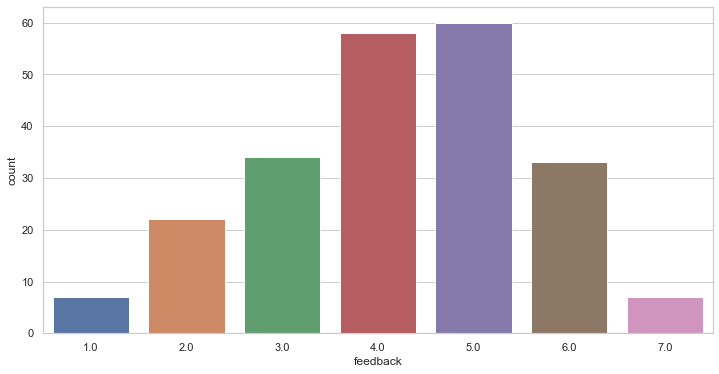

In [39]:
# Add barchart with feedback
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="feedback",data=df)


# Effect of Nudging on Customer Experience (feedback)

### Distribution of Data
If one looks at the distribution of the data concerning the treatment, no significant differences are noticeable. The distribution of different feedback values is almost balanced. The bar plot below shows this observation in a visual way.

In [9]:
# group data by nudge
nudge_group = df.groupby("nudge")
nudge_group.feedback.value_counts()

nudge  feedback
0      4.0         32
       5.0         31
       3.0         16
       6.0         15
       2.0         12
       1.0          4
       7.0          1
1      5.0         29
       4.0         26
       3.0         18
       6.0         18
       2.0         10
       7.0          6
       1.0          3
Name: feedback, dtype: int64

In [10]:
nudge_group.describe()

feedback                                             
         count      mean       std  min  25%  50%  75%  max
nudge                                                      
0        111.0  4.108108  1.344019  1.0  3.0  4.0  5.0  7.0
1        110.0  4.327273  1.446978  1.0  3.0  4.0  5.0  7.0

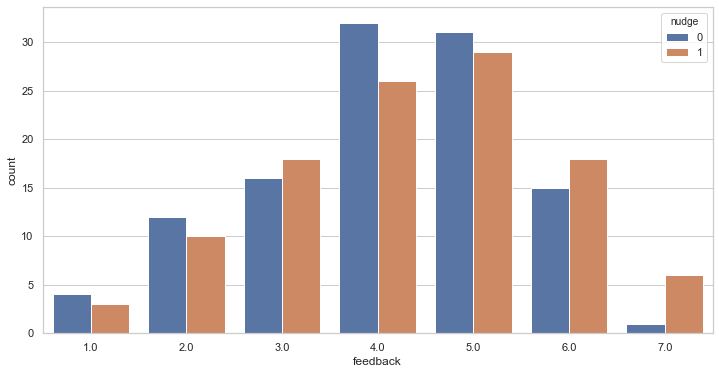

In [23]:
# swarmplot
#plt.figure(figsize=(12, 8))
#sns.swarmplot(x=df['nudge'], y=df['feedback'])

# Feedback distribution with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="feedback", hue="nudge",data=df,)


### Average Treatment Effect

In [76]:
# ATE

# Users that provided feedback
df_users_with_feedback = df[df.feedback != 0]

nudge_group = df_users_with_feedback[df_users_with_feedback.nudge == 1].feedback
no_nudge_group = df_users_with_feedback[df_users_with_feedback.nudge == 0].feedback

mean_nudge =nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: 0.2192


The negative ATE shows a small positive effect on the user experience if a high threat nudge is displayed. Interestingly this positive effect is very low and, therefore, not significant if one observes the complete user set.

### Mann-Withney-U Test
Since the values in the dataset are not completely normally distributed, a Mann-Withney-U Test is suitable to study the effect of the treatment. A Mann-Whitney-U Test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population. 

In this case, the null hypothesis H0 assumes that the nudge will not affect the user experience.

In [44]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

nudge = df[df.nudge == 1].feedback.array
no_nudge = df[df.nudge == 0].feedback.array

# compare samples
stat, p = mannwhitneyu(nudge, no_nudge)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=12395.500, p=0.110
Same distribution (fail to reject H0)


Since the Mann-Whitney-U test shows a same distribution in both groups, **there is no significant effect of the nudge on the overall user experience**.

## Analysis of Subsets

### Family Status
This section includes the analysis of the treatment on the user experience with regards to the family status of consumers.

In [25]:
# group data by nudge
family_nudge_group = df.groupby(["nudge", "family"])
family_nudge_group.feedback.value_counts()

nudge  family  feedback
0      family  4.0         17
               5.0          9
               6.0          8
               2.0          6
               3.0          6
               1.0          3
       single  5.0         22
               4.0         15
               3.0         10
               6.0          7
               2.0          6
               1.0          1
               7.0          1
1      family  5.0         16
               6.0         15
               4.0         12
               7.0          5
               3.0          4
               2.0          2
       single  3.0         14
               4.0         14
               5.0         13
               2.0          8
               1.0          3
               6.0          3
               7.0          1
Name: feedback, dtype: int64

In [46]:
df[df.family == 'family'].feedback.describe()

count    103.000000
mean       4.495146
std        1.420258
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: feedback, dtype: float64

In [47]:
df[df.family == 'single'].feedback.describe()

count    118.000000
mean       3.974576
std        1.336291
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: feedback, dtype: float64

In [26]:
family_nudge_group.describe()

feedback                                             
                count      mean       std  min  25%  50%  75%  max
nudge family                                                      
0     family     49.0  3.959184  1.428274  1.0  3.0  4.0  5.0  6.0
      single     62.0  4.225806  1.272913  1.0  3.0  4.0  5.0  7.0
1     family     54.0  4.981481  1.236104  2.0  4.0  5.0  6.0  7.0
      single     56.0  3.696429  1.360744  1.0  3.0  4.0  5.0  7.0

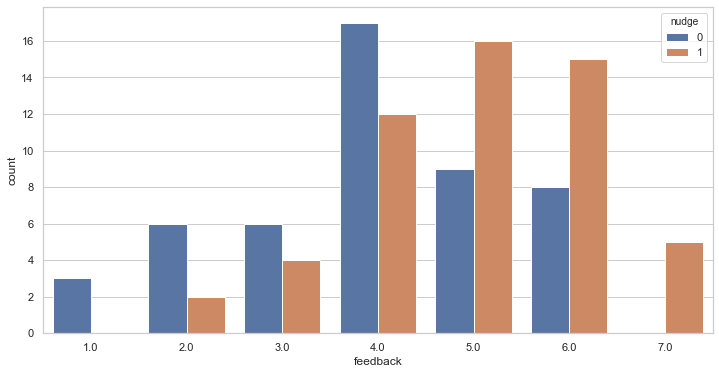

In [77]:
# Barplot with feedback for families

# Feedback distribution with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="feedback", hue="nudge",data=df[df.family=='family'],)


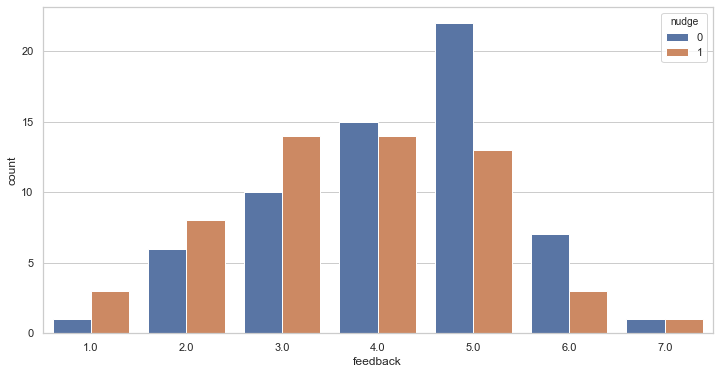

In [78]:
# Barplot with feedback for singles

# Feedback distribution with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="feedback", hue="nudge",data=df[df.family=='single'],)


#### Average Treatment Effect

In [50]:
# ATE

# Users that provided feedback and have family status: family
df_families_with_feedback = df[(df.feedback != 0) & (df.family == 'family')]

nudge_group = df_families_with_feedback[df_families_with_feedback.nudge == 1].feedback
no_nudge_group = df_families_with_feedback[df_families_with_feedback.nudge == 0].feedback

mean_nudge =nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: 1.0223


In the analysis for this subset the ATE shows a clear positive effect on the user experience if a high threat nudge is displayed. **This shows a significant effect for users that choose the insurance product as a family coverage.**

### Mann-Whitney U Test

In [51]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

nudge_family = df[(df.nudge == 1) & (df.family == 'family')].feedback.array
no_nudge_family = df[(df.nudge == 0) & (df.family == 'family')].feedback.array

# compare samples
stat, p = mannwhitneyu(nudge_family, no_nudge_family)
print('Statistics=%.5f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=1022.00000, p=0.00144
Different distribution (reject H0)


Additionally the Mann-Whitney-U test shows another outcome for the family group. Here, the distribution is different which means **there is a significant effect of the nudge on the overall user experience**

# Effect of Nudging on Chosen Tariff Option (option)

This part includes the analysis of the designed nudge on the chosen tariff option. Since the option feature includes text values, those values are transformed to numbers with a categorical ordering.

The mapping is as follows:  
_basic_ -> **1**  
_comfort_ -> **2**  
_top_ -> **3**

In [27]:
# mapping of option to ordinal category
# not needed when the numeric dataset is used for processing
from pandas.api.types import CategoricalDtype

ordered_option = ['basic', 'comfort', 'top']
df.option = df.option.astype(CategoricalDtype(ordered=True,categories=ordered_option))

### Distribution of Data
The distribution of the data concerning the treatment, some differences are noticeable. Especially the number of top options are very different. The bar plot below shows this observation in a visual way.

In [28]:
# group data by nudge
nudge_group = df.groupby("nudge")
nudge_group.option.value_counts()

nudge  option 
0      comfort    46
       basic      41
       top        24
1      top        53
       comfort    40
       basic      17
Name: option, dtype: int64

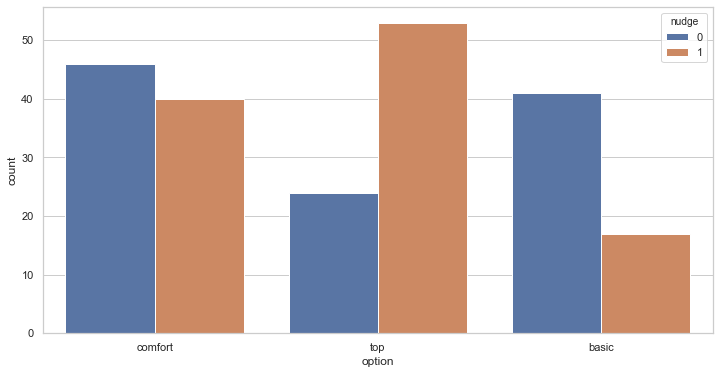

In [32]:
# Add barchart with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to choice options based on nudge
g = sns.countplot(x="option", hue="nudge",data=df, order = df['option'].value_counts().index)


### Average Treatment Effect

In [84]:
# ATE

# Users with choice
df_users_with_choice = df_numeric[df_numeric.option.notnull()]

nudge_group = df_users_with_choice[df_users_with_choice.nudge == 1].option
no_nudge_group = df_users_with_choice[df_users_with_choice.nudge == 0].option

mean_nudge = nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: 0.4804


In contrast to the feedback, the treatment shows a positive average effect on the tariff option if a high threat nudge is displayed. Therefore there is a tendency that more expensive options with broader coverage are chosen. Since the numbers are smaller than in the feedback feature, this effect can be seen as **significant**.

### Mann-Withney-U Test
Since the values in the dataset are not completely normally distributed, a Mann-Withney-U Test is suitable to study the effect of the treatment. A Mann-Whitney-U Test is a nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one population will be less than or greater than a randomly selected value from a second population. 

In this case, the null hypothesis H0 assumes that the nudge will not affect the tariff option.

In [86]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Users with choice
df_users_with_choice = df[df.option.notnull()]

nudge = df_users_with_choice[df_users_with_choice.nudge == 1].option.array
no_nudge = df_users_with_choice[df_users_with_choice.nudge == 0].option.array

# compare samples
stat, p = mannwhitneyu(nudge, no_nudge)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=4054.500, p=0.00000
Different distribution (reject H0)


Since the test shows a different distribution of values**there is a significant effect of the nudge on the chosen tariff option**

## Analysis of Subsets

### Family Status
This section includes the analysis of the treatment on the chose tariff option with regards to the family status of consumers.

In [92]:
# group data by nudge
family_nudge_group = df.groupby(["nudge", "option"])
family_nudge_group.feedback.value_counts()

nudge  option   feedback
0      basic    4.0         15
                5.0         13
                3.0          5
                6.0          4
                2.0          3
                1.0          1
       comfort  4.0         14
                5.0         14
                3.0          9
                2.0          4
                6.0          4
                1.0          1
       top      6.0          7
                2.0          5
                5.0          4
                4.0          3
                1.0          2
                3.0          2
                7.0          1
1      basic    4.0          6
                2.0          5
                1.0          3
                5.0          2
                3.0          1
       comfort  3.0         14
                5.0         14
                4.0          8
                2.0          2
                6.0          2
       top      6.0         16
                5.0         13
              

In [89]:
df[df.family == 'family'].option.describe()

count     103
unique      3
top       top
freq       51
Name: option, dtype: object

In [90]:
df[df.family == 'single'].option.describe()

count       118
unique        3
top       basic
freq         53
Name: option, dtype: object

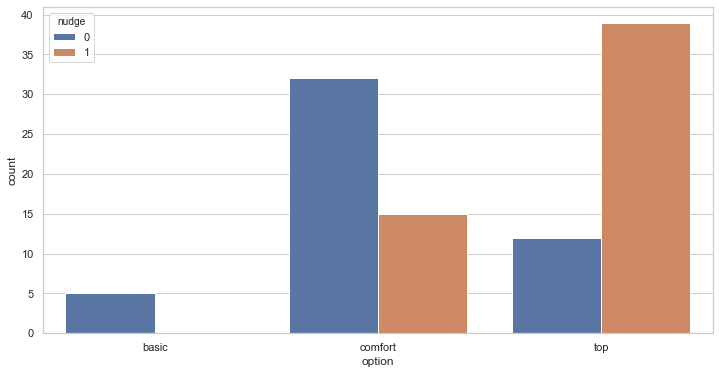

In [93]:
# Barplot with feedback for families

# Feedback distribution with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="option", hue="nudge",data=df[df.family=='family'],)


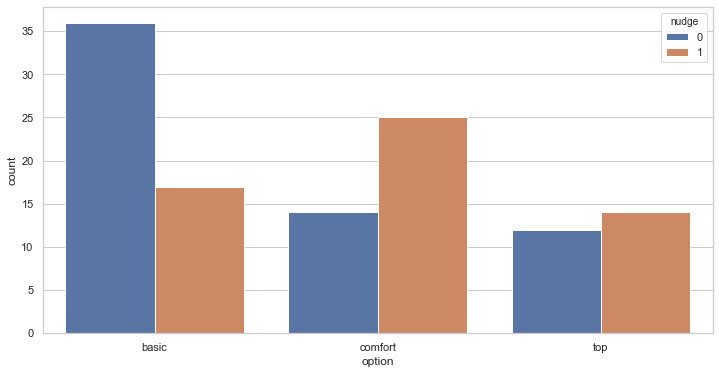

In [94]:
# Barplot with feedback for singles

# Feedback distribution with split on nudge data
sns.set(style="whitegrid")

# Draw a nested barplot to feedback based on nudge
g = sns.countplot(x="option", hue="nudge",data=df[df.family=='single'],)


#### Average Treatment Effect

In [95]:
# ATE

# Users that provided feedback and have family status: family
df_families_with_feedback = df_numeric[(df_numeric.option.notnull()) & (df_numeric.family == 'family')]

nudge_group = df_families_with_feedback[df_families_with_feedback.nudge == 1].option
no_nudge_group = df_families_with_feedback[df_families_with_feedback.nudge == 0].option

mean_nudge =nudge_group.mean()
mean_no_nudge = no_nudge_group.mean()

ate = mean_nudge - mean_no_nudge
print("Average Treatment Effect: %.4f" % ate)

Average Treatment Effect: 0.5794


In the analysis for this subset the ATE shows a clear positive effect on the user experience if a high threat nudge is displayed. **This shows a significant effect on the tariff option for users that choose the insurance product as a family coverage.**

### Mann-Whitney U Test

In [96]:
# Non-parametric Mann Whitney U Test
import numpy as np
import scipy.stats as stats
from scipy.stats import mannwhitneyu

nudge_family = df_numeric[(df_numeric.nudge == 1) & (df_numeric.family == 'family')].option.array
no_nudge_family = df_numeric[(df_numeric.nudge == 0) & (df_numeric.family == 'family')].option.array

# compare samples
stat, p = mannwhitneyu(nudge_family, no_nudge_family)
print('Statistics=%.5f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=872.00000, p=0.00001
Different distribution (reject H0)


Additionally the Mann-Whitney-U test shows another outcome for the family group. Here, the distribution is different which means **there is a significant effect of the nudge on the chosen tariff option**